# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [134]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [135]:
df = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [136]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [137]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

#### Declare feature vector and target variable : without any feature selection.

In [138]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [184]:
x = df.drop(['booking_complete'], axis= 1)
y = df['booking_complete']

#### Split the data into seperate training and test set

In [185]:
# split data into traing and test sets
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.33, random_state= 42)

In [186]:
# check the shape of x_tarin and x_test

x_train.shape, x_test.shape

((33500, 13), (16500, 13))

#### Feature Engineering : The process of transforming raw data into machine understandble form to increase the predictive power.


#### Encoding categorical values.

In [187]:
# import category encoders
import category_encoders as ce

In [188]:
encoder = ce.OrdinalEncoder(cols = ['route', 'booking_origin', 'sales_channel', 'trip_type', 'flight_day'])

x_tarin = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [189]:
x_test.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
33553,2,1,1,47,4,15,4,17.0,9.0,1,1,0,7.00
9427,1,2,1,46,85,14,3,7.0,6.0,1,1,0,8.83
199,1,1,1,132,20,9,3,14.0,-1.0,1,0,0,8.83
12447,1,1,1,58,18,23,3,525.0,9.0,1,1,1,7.57
39489,2,1,1,50,5,5,4,8.0,5.0,1,0,0,6.62


#### Random Forest Classifier model with default parameters

In [190]:
# import ramdom forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
rfc = RandomForestClassifier(n_estimators= 10, random_state= 0)

# fit the model
rfc.fit(x_tarin, y_train)

# Predict the test set results
y_pred = rfc.predict(x_test)

# Check the accuracy
from sklearn.metrics import accuracy_score

print("Model accurcy score with 10 decision-trees : {0:0.4f}".format(accuracy_score(y_test, y_pred)))

Model accurcy score with 10 decision-trees : 0.8469


Here **y_test** are true target values **y_predict** are predict target values.

#### Random Forest Classifier model with n_estimators = 100

In [191]:
# import ramdom forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
rfc = RandomForestClassifier(n_estimators= 100, random_state= 0)

# fit the model
rfc.fit(x_tarin, y_train)

# Predict the test set results
y_pred = rfc.predict(x_test)

# Check the accuracy
from sklearn.metrics import accuracy_score

print("Model accurcy score with 100 decision-trees : {0:0.4f}".format(accuracy_score(y_test, y_pred)))

Model accurcy score with 100 decision-trees : 0.8519


Here Random classifier model based on **n_estimators = 100**
accuracy score is of 0.8519 . Earlier when **n_estimators = 10** we got accuracy score was 0.8464. Accuracy score get improved by increase in n_estimators.

#### Find the important features with Random Forest model
Until now, we have used all the features.Now,Select the only important features to build model and see its effect on accuracy.

In [147]:
# import ramdom forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
clf = RandomForestClassifier(n_estimators= 100, random_state= 0)

# fit the model
clf.fit(x_tarin, y_train)

RandomForestClassifier(random_state=0)

In [148]:
# view the feature scores
feature_scores = pd.Series(clf.feature_importances_, index= x_train.columns).sort_values(ascending= False)
feature_scores

purchase_lead            0.189647
route                    0.147541
flight_hour              0.138942
length_of_stay           0.126026
booking_origin           0.117373
flight_day               0.088371
flight_duration          0.075129
num_passengers           0.049359
wants_in_flight_meals    0.022560
wants_preferred_seat     0.016073
wants_extra_baggage      0.015345
sales_channel            0.011974
trip_type                0.001660
dtype: float64

#### Visualize the feature score of the features

Text(0.5, 1.0, 'Visualising Important Features')

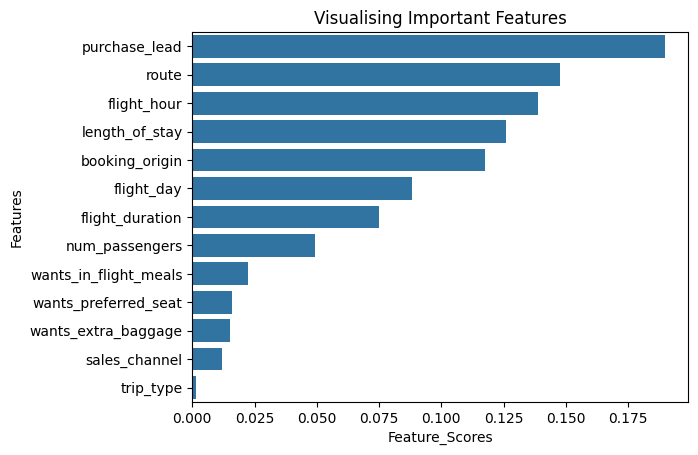

In [149]:
# Creating the bar graph 
sns.barplot(x= feature_scores, y= feature_scores.index)

# Add labels
plt.xlabel("Feature_Scores")
plt.ylabel("Features")
plt.title("Visualising Important Features")

#### Now Build the Random Forest Classifier based on selected features.

In [155]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [165]:
# Declare the x and y sets
X = df.drop(['booking_complete', 'trip_type'], axis= 1)
Y = df['booking_complete']

X.columns

Index(['num_passengers', 'sales_channel', 'purchase_lead', 'length_of_stay',
       'flight_hour', 'flight_day', 'route', 'booking_origin',
       'wants_extra_baggage', 'wants_preferred_seat', 'wants_in_flight_meals',
       'flight_duration'],
      dtype='object')

In [166]:
# Split the train and test sets
from sklearn.model_selection import train_test_split
X_test, X_train, Y_test, Y_train = train_test_split(X, Y, test_size= 0.33, random_state= 42)

Now build Random Forest model and check accuracy

In [167]:
# Encode the categorical values.
encoder = ce.OrdinalEncoder(cols= ['route', 'booking_origin', 'flight_day', 'sales_channel'])

X_tarin = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [170]:
# import ramdom forest classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier
clf = RandomForestClassifier(n_estimators= 100, random_state= 0)

# fit the model
clf.fit(X_tarin, Y_train)

# Predict the test set results
Y_pred = clf.predict(X_test)

# Check the accuracy
from sklearn.metrics import accuracy_score

print("Model accurcy score with 100 decision-trees : {0:0.4f}".format(accuracy_score(Y_test, Y_pred)))

Model accurcy score with 100 decision-trees : 0.8509


I have removed the trip_type variable having low feature score and rebuiled the model and checked the accuracy. The accuracy of the model is 0.8509. The accuracy is slightly decreased by 0.0010.

#### Confusion matrix
It gives the summarizing the performance of a classificatin algorithm and the types of errors produced by the model.
It gives the correct and incorrect predictions brokendown by each category.

In [175]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print("Confusion matrix:\n\n",cm)

Confusion matrix:

 [[13796   246]
 [ 2198   260]]


#### Classification Report
**Classification report** is another way to evalute the classification model performance. it displays the precision, recall, f1 and support scores for the model. I have described these in later.

In [176]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92     14042
           1       0.51      0.11      0.18      2458

    accuracy                           0.85     16500
   macro avg       0.69      0.54      0.55     16500
weighted avg       0.81      0.85      0.81     16500

